In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
train_df = pd.read_csv('train_CSRqzyo.csv')

In [3]:
test_df = pd.read_csv('test_wYRkl1c.csv')

In [4]:
combined = [test_df,test_df]

In [5]:
train_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'ID'],
      dtype='object')

In [6]:
#df = pd.DataFrame(combined,index=None,columns=train_df.columns)

In [7]:
train_df.shape

(8523, 11)

In [8]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15OUT049
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01OUT018
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15OUT049
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,FDX07OUT010
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19OUT013


In [9]:
train_df.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
ID                           8523 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


In [10]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
train_df.shape

(8523, 11)

In [12]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15OUT049
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01OUT018
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15OUT049
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,FDX07OUT010
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19OUT013


# Category correction

In [13]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Here we can see the 3 values for the same variable low fat and similar for regular, so we want to make the corrections here

In [14]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('LF','low fat').str.lower()

In [15]:
train_df['Item_Fat_Content'].value_counts()

low fat    5517
regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [16]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace('reg','regular')

In [17]:
train_df['Item_Fat_Content'].value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

Making the changes in the test dataset

In [18]:
test_df['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [19]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace('LF','low fat').str.lower()

In [20]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace('reg','regular')

In [21]:
test_df['Item_Fat_Content'].value_counts()

low fat    3668
regular    2013
Name: Item_Fat_Content, dtype: int64

# Missing values

In [22]:
train_df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
ID                              0
dtype: int64

Lets Deal with the null values

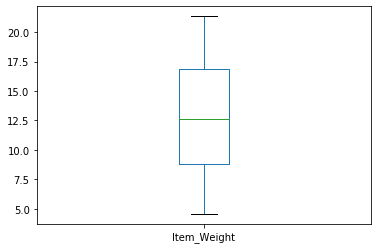

In [23]:
train_df['Item_Weight'].plot.box()

We could see that there are no outliers so we can go ahead and fill the missing values using anyone of the imputing methods(mean,median,mode)

In [24]:
me = train_df['Item_Weight'].mean()
train_df['Item_Weight'].fillna(me,inplace=True)

Working on other categorical variable for missing values

In [25]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Since the missing value 28% of entire data, we can categorise it into another category instead of filling it by mode

In [26]:
train_df['Outlet_Size'].fillna('not_categorised',inplace=True)

In [27]:
train_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
ID                           0
dtype: int64

In [28]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
ID                           8523 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


Missing values in the test dataset

In [30]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,ID
0,20.750,low fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,FDW58OUT049
1,8.300,regular,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1,FDW14OUT017
2,14.600,low fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store,NCN55OUT010
3,7.315,low fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1,FDQ58OUT017
4,NaN,regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,FDY38OUT027


In [31]:
test_df.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
ID                              0
dtype: int64

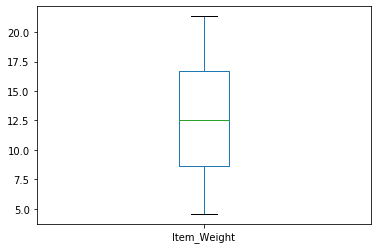

In [32]:
test_df['Item_Weight'].plot.box()

In [33]:
#no outliers are present

In [34]:
m1 = test_df['Item_Weight'].median()
test_df['Item_Weight'].fillna(m1,inplace=True)

In [35]:
test_df['Outlet_Size'].fillna('not_categorised',inplace=True)

In [36]:
test_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
ID                           0
dtype: int64

# Exploratory Data Analysis

Let us first explore the categorical variables

In [37]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [38]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID
0,9.30,low fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15OUT049
1,5.92,regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01OUT018
2,17.50,low fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15OUT049
3,19.20,regular,0.000000,Fruits and Vegetables,182.0950,1998,not_categorised,Tier 3,Grocery Store,732.3800,FDX07OUT010
4,8.93,low fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19OUT013


In [39]:
train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [40]:
train_df['Outlet_Size'].value_counts()

Medium             2793
not_categorised    2410
Small              2388
High                932
Name: Outlet_Size, dtype: int64

In [41]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [42]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [43]:
train_df['Item_Fat_Content'].value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

# Univariate Analysis of Continious variables

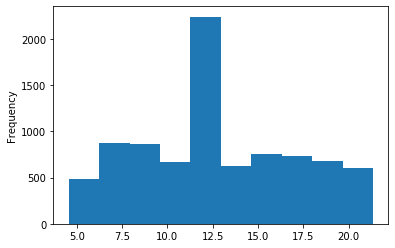

In [44]:
train_df['Item_Weight'].plot.hist()

In [45]:
train_df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

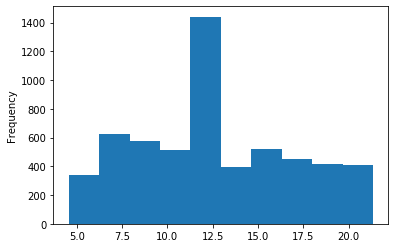

In [46]:
test_df['Item_Weight'].plot.hist()

In [47]:
test_df['Item_Weight'].describe()

count    5681.000000
mean       12.662023
std         4.245831
min         4.555000
25%         9.195000
50%        12.500000
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64

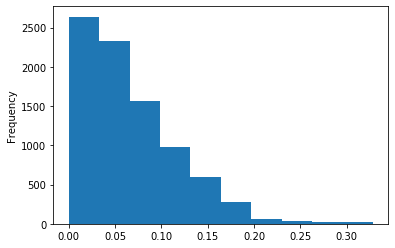

In [48]:
train_df['Item_Visibility'].plot.hist()

Above looks a right skewed data, so we can perform log transformation on the above graph

In [49]:
train_df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

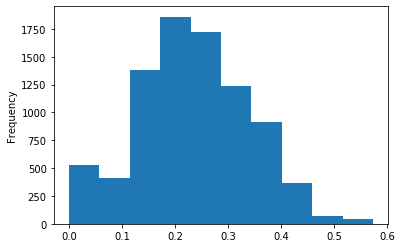

In [50]:
np.sqrt(train_df['Item_Visibility']).plot.hist()

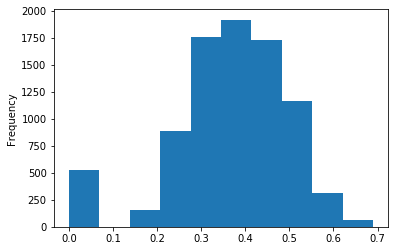

In [51]:
np.power(train_df['Item_Visibility'],1/3).plot.hist()

looks like the square root transformation provides a better transformation so taking it to account

In [52]:
train_df['Item_Visibility'] = np.sqrt(train_df['Item_Visibility'])

In [53]:
train_df['Item_Visibility'].describe()

count    8523.000000
mean        0.233709
std         0.107301
min         0.000000
25%         0.164285
50%         0.232230
75%         0.307547
max         0.573054
Name: Item_Visibility, dtype: float64

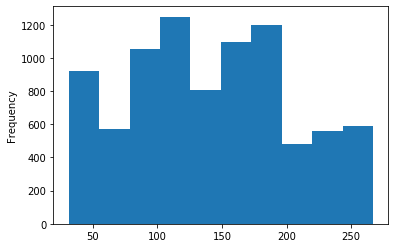

In [54]:
train_df['Item_MRP'].plot.hist()

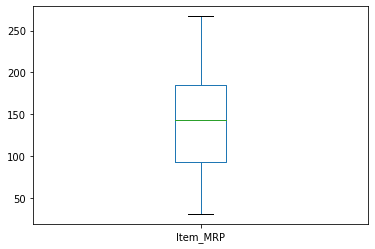

In [55]:
train_df['Item_MRP'].plot.box()

# no outliers and the transformation looks ok

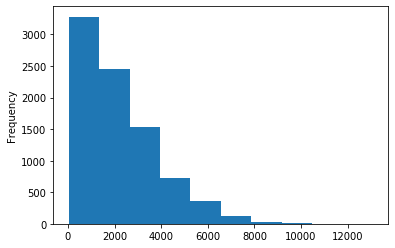

In [56]:
train_df['Item_Outlet_Sales'].plot.hist()

In [57]:
train_df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [58]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.233709,140.992782,1997.831867,2181.288914
std,4.226124,0.107301,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.164285,93.826500,1987.000000,834.247400
50%,12.857645,0.232230,143.012800,1999.000000,1794.331000
75%,16.000000,0.307547,185.643700,2004.000000,3101.296400
max,21.350000,0.573054,266.888400,2009.000000,13086.964800


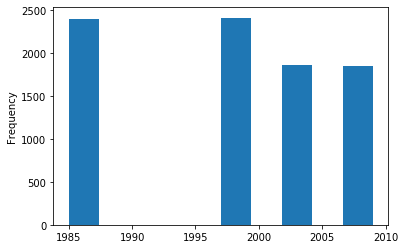

In [59]:
train_df['Outlet_Establishment_Year'].plot.hist()

In [60]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID
0,9.30,low fat,0.126678,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15OUT049
1,5.92,regular,0.138846,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01OUT018
2,17.50,low fat,0.129461,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15OUT049
3,19.20,regular,0.000000,Fruits and Vegetables,182.0950,1998,not_categorised,Tier 3,Grocery Store,732.3800,FDX07OUT010
4,8.93,low fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19OUT013


# Univariate analysis of Categorical variables

Text(0.5, 1.0, 'Fat content')

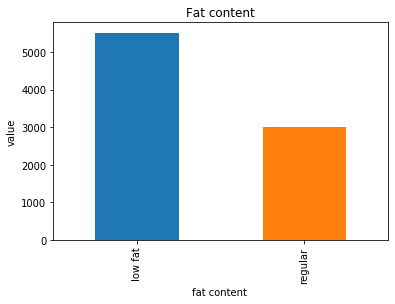

In [61]:
train_df['Item_Fat_Content'].value_counts().plot.bar()
plt.xlabel('fat content ')
plt.ylabel('value')
plt.title('Fat content')

Text(0.5, 1.0, 'Fat content')

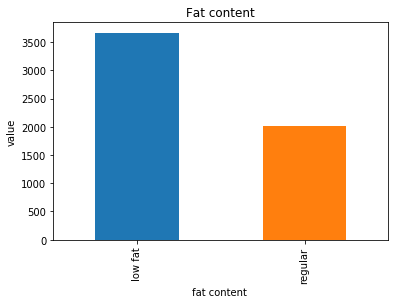

In [62]:
test_df['Item_Fat_Content'].value_counts().plot.bar()
plt.xlabel('fat content ')
plt.ylabel('value')
plt.title('Fat content')

In [63]:
count_percent = train_df['Item_Fat_Content'].value_counts()/len(train_df['Item_Fat_Content'])

Text(0.5, 1.0, '% of fat')

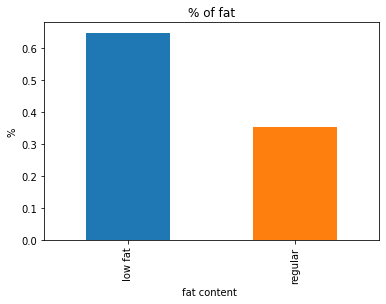

In [64]:
count_percent.plot.bar()
plt.xlabel('fat content ')
plt.ylabel('%')
plt.title('% of fat')

We can see that the products with low fat was sold most

Text(0.5, 1.0, 'Item type')

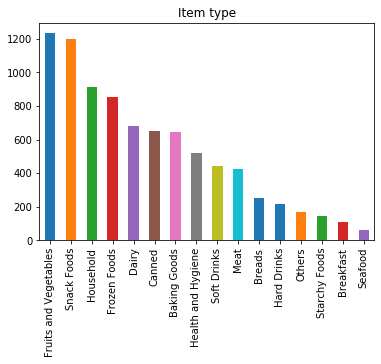

In [65]:
train_df['Item_Type'].value_counts().plot.bar()
plt.title('Item type')

Text(0.5, 1.0, 'Outlet size')

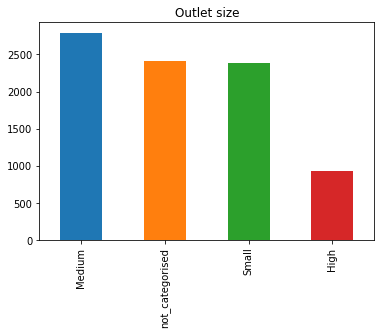

In [66]:
train_df['Outlet_Size'].value_counts().plot.bar()
plt.title('Outlet size')

Text(0.5, 1.0, 'Outlet size')

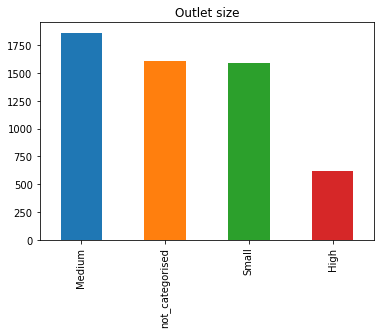

In [67]:
test_df['Outlet_Size'].value_counts().plot.bar()
plt.title('Outlet size')

Text(0.5, 1.0, 'Outlet_Location_Type')

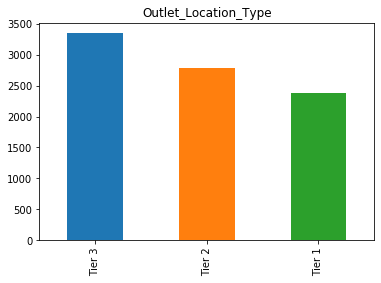

In [68]:
train_df['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Outlet_Location_Type')

Text(0.5, 1.0, 'Outlet_Location_Type')

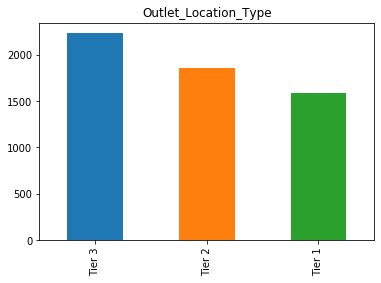

In [69]:
test_df['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Outlet_Location_Type')

Tier 3 cities have recorded most sales

Text(0.5, 1.0, 'Outlet_Type')

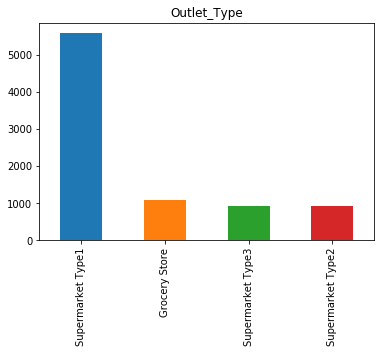

In [70]:
train_df['Outlet_Type'].value_counts().plot.bar()
plt.title('Outlet_Type')

Super markets are the ones where most prodcts are sold.

Also we can see that the datas are eqully distributed b/w the train and test data sets

# Bi-variate Analysis

In [71]:
# Continous and Coninous variables

In [72]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID
0,9.30,low fat,0.126678,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15OUT049
1,5.92,regular,0.138846,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01OUT018
2,17.50,low fat,0.129461,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15OUT049
3,19.20,regular,0.000000,Fruits and Vegetables,182.0950,1998,not_categorised,Tier 3,Grocery Store,732.3800,FDX07OUT010
4,8.93,low fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19OUT013


In [73]:
train_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.007262,0.024756,-0.008301,0.011550
Item_Visibility,-0.007262,1.000000,0.004480,-0.055997,-0.101234
Item_MRP,0.024756,0.004480,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.055997,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.101234,0.567574,-0.049135,1.000000


we can see that no items are much correlated, we can also see there is a slight correlation b/w the Iteem MRP and Item outlet sales 

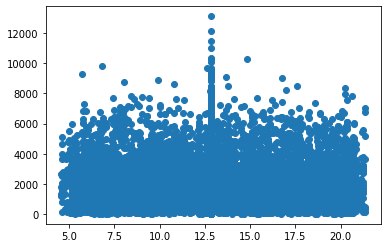

In [74]:
plt.scatter(train_df['Item_Weight'],train_df['Item_Outlet_Sales'])

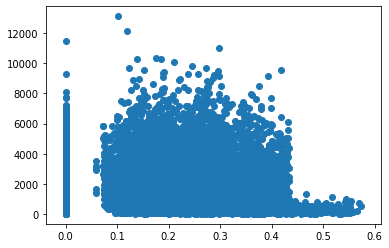

In [75]:
plt.scatter(train_df['Item_Visibility'],train_df['Item_Outlet_Sales'])

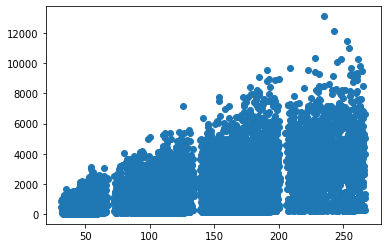

In [76]:
plt.scatter(train_df['Item_MRP'],train_df['Item_Outlet_Sales'])

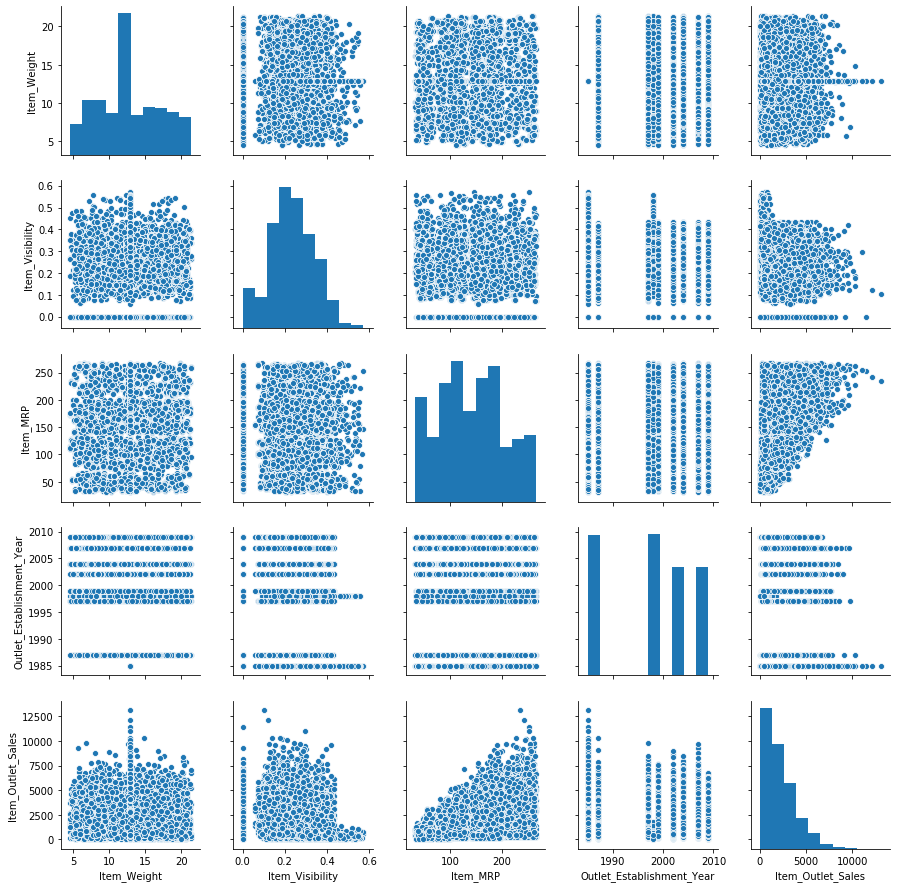

In [166]:
import seaborn as sns
sns.pairplot(train_df)

In [77]:
#df2 = train_df[train_df['Item_Outlet_Sales'] > 3101]#['Item_Fat_Content'].value_counts()

In [78]:
#df2['Item_MRP'].describe()

In [79]:
#train_df['Item_MRP'].describe()

# Categorical - categorical analysis

In [80]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID
0,9.30,low fat,0.126678,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15OUT049
1,5.92,regular,0.138846,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01OUT018
2,17.50,low fat,0.129461,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15OUT049
3,19.20,regular,0.000000,Fruits and Vegetables,182.0950,1998,not_categorised,Tier 3,Grocery Store,732.3800,FDX07OUT010
4,8.93,low fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19OUT013


In [81]:
pd.crosstab(train_df['Outlet_Location_Type'],train_df['Outlet_Size'])

Outlet_Size,High,Medium,Small,not_categorised
Outlet_Location_Type,,,,
Tier 1,0,930,1458,0
Tier 2,0,0,930,1855
Tier 3,932,1863,0,555


In [82]:
from scipy.stats import chi2_contingency

In [83]:
chi2_contingency(pd.crosstab(train_df['Outlet_Location_Type'],train_df['Outlet_Size']))

(7095.276431132899,
 0.0,
 6,
 array([[ 261.13058782,  782.55121436,  669.07708553,  675.24111228],
        [ 304.54300129,  912.64871524,  780.30975009,  787.49853338],
        [ 366.32641089, 1097.8000704 ,  938.61316438,  947.26035434]]))

In [84]:
pd.crosstab(train_df['Outlet_Location_Type'],train_df['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


In [85]:
chi2_contingency(pd.crosstab(train_df['Outlet_Location_Type'],train_df['Outlet_Type']))

(4725.606588766826,
 0.0,
 6,
 array([[ 303.43822598, 1562.58078141,  260.00985568,  261.97113692],
        [ 353.88419571, 1822.35656459,  303.23594978,  305.52328992],
        [ 425.67757832, 2192.062654  ,  364.75419453,  367.50557315]]))

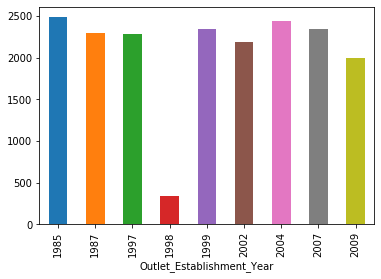

In [86]:
train_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

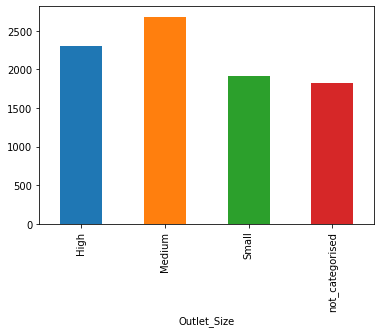

In [87]:
train_df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar()

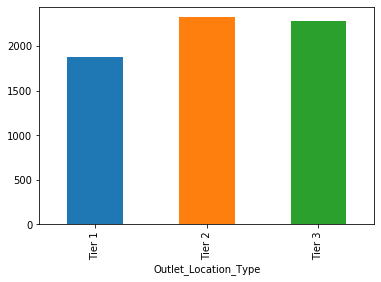

In [88]:
train_df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()

In [89]:
train_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,ID
0,9.300000,low fat,0.126678,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FDA15OUT049
1,5.920000,regular,0.138846,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRC01OUT018
2,17.500000,low fat,0.129461,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FDN15OUT049
3,19.200000,regular,0.000000,Fruits and Vegetables,182.0950,1998,not_categorised,Tier 3,Grocery Store,732.3800,FDX07OUT010
4,8.930000,low fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NCD19OUT013
5,10.395000,regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088,FDP36OUT018
6,13.650000,regular,0.112876,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528,FDO10OUT013
7,12.857645,low fat,0.357029,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636,FDP10OUT027
8,16.200000,regular,0.129179,Frozen Foods,96.9726,2002,not_categorised,Tier 2,Supermarket Type1,1076.5986,FDH17OUT045
9,19.200000,regular,0.307327,Frozen Foods,187.8214,2007,not_categorised,Tier 2,Supermarket Type1,4710.5350,FDU28OUT017


In [90]:
train_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [91]:
train_df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

# Removing ID column

In [92]:
#df_col_merged =pd.concat([train_df, test_df], axis=1)

ID column both data sets doesnt give much information o our model so we are removing it before creating dummies

In [93]:
train_df.shape

(8523, 11)

In [94]:
train_df.drop(['ID'],axis=1,inplace=True)


In [95]:
print(train_df.shape)

(8523, 10)


In [96]:
test_df.head()
print(test_df.shape)
test_df.drop(['ID'],axis=1,inplace=True)
print(test_df.shape)

(5681, 10)
(5681, 9)


In [97]:
print('print(test_df.shape)',test_df.shape)
print('print(train_df.shape)',train_df.shape)

print(test_df.shape) (5681, 9)
print(train_df.shape) (8523, 10)


In [98]:
#train_dummies = pd.get_dummies(train_df)

In [99]:
#train_dummies.shape

In [100]:
#test_dummies = pd.get_dummies(test_df)

In [101]:
#test_dummies.shape()

# Merging data sets and getting the dummies 

In [102]:
df_row_merged = pd.concat([train_df, test_df], ignore_index=True)

C:\Users\Del\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [103]:
df = pd.get_dummies(df_row_merged)

In [104]:
df = pd.DataFrame(df,index=None,columns=df.columns)

In [105]:
df.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_not_categorised,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,3735.1380,0.126678,9.30,1999,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,48.2692,443.4228,0.138846,5.92,2009,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,141.6180,2097.2700,0.129461,17.50,1999,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,182.0950,732.3800,0.000000,19.20,1998,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,53.8614,994.7052,0.000000,8.93,1987,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [106]:
df.shape

(14204, 34)

# Splitting the test set post concat for dummies

In [107]:
df['Item_Outlet_Sales'].isnull().sum()

5681

In [108]:
#df.isnull().sum()

In [109]:
df['Item_Outlet_Sales'].fillna('missing',inplace=True)

In [110]:
test_post_dummies = df[df['Item_Outlet_Sales'] == 'missing']

In [111]:
test_dummies = pd.DataFrame(test_post_dummies,index=None,columns=test_post_dummies.columns)

In [112]:
test_dummies.shape

(5681, 34)

In [113]:
test_dummies = test_dummies.drop(['Item_Outlet_Sales'],axis=1)

In [114]:
df.shape

(14204, 34)

In [115]:
X_Dummies = df[df['Item_Outlet_Sales'] != 'missing']

In [116]:
X_Dummies.shape

(8523, 34)

In [117]:
X = X_Dummies.drop(['Item_Outlet_Sales'],axis =1)
y = X_Dummies['Item_Outlet_Sales']

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print('X_train shape:', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape', y_test.shape)
print('percent in X_train:', X_train.shape[0]/(X_train.shape[0] + X_test.shape[0]))
print('percent in X_test:', X_test.shape[0]/(X_train.shape[0] + X_test.shape[0]))

X_train shape: (6818, 33)
y_train shape (6818,)
X_test shape: (1705, 33)
y_test shape (1705,)
percent in X_train: 0.7999530681684853
percent in X_test: 0.20004693183151473


In [119]:
lr = LinearRegression()

In [120]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [121]:
lr.score(X_test,y_test)

0.5866849470696196

In [122]:
#predicting train set
train_pred = lr.predict(X_train)

In [123]:
#predecting test set

In [124]:
test_pred = lr.predict(X_test)

In [125]:
# Predicting the model on the train dataset
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as msee

train_pred = lr.predict(X_train)
k = mae(y_train,train_pred)
k1 = msee(y_train,train_pred)
print('The mae in the train data set is',k )
print('The mse in the train data set is',k1)

The mae in the train data set is 848.0152181471485
The mse in the train data set is 1310645.184629446


In [126]:
# Predicting the model on the test dataset
test_pred = lr.predict(X_test)
k = mae(y_test,test_pred)
k1 = msee(y_test,test_pred)
print('The mae in the test data set is',k )
print('The mse in the test data set is',k1)

The mae in the test data set is 792.6264512252568
The mse in the test data set is 1111025.7519038448


In [127]:
y_pred = lr.predict(test_dummies)

In [128]:
y_pred = pd.DataFrame(y_pred,index=None,columns=['Predicted values'])

In [129]:
y_pred.to_csv('First_op.csv')

# Parameters of Linear Regression

In [130]:
lr.coef_

array([ 1.55434758e+01, -1.84966226e+02, -5.77362277e-01,  3.35336285e+01,
       -2.21879988e+01,  2.21879988e+01, -3.67807507e+01,  8.20496668e+00,
        6.79867511e+01, -1.24392587e+01, -2.68085518e+01, -2.29557330e+01,
        2.66212578e+01,  9.60511775e+00,  1.05054890e+01, -4.47232002e+01,
       -1.74355652e+01, -5.28774737e+01,  1.13429198e+02, -1.62219705e+01,
       -2.84730756e+01,  2.23627987e+01,  1.37293087e+02,  3.85722664e+01,
       -1.75865354e+02,  5.40694550e+02, -1.12913115e+02, -1.48038313e+02,
       -2.79743122e+02, -1.56494185e+03, -6.43130527e+01, -4.43274965e+02,
        2.07252987e+03])

Text(0.5, 1.0, 'Coefficient plot')

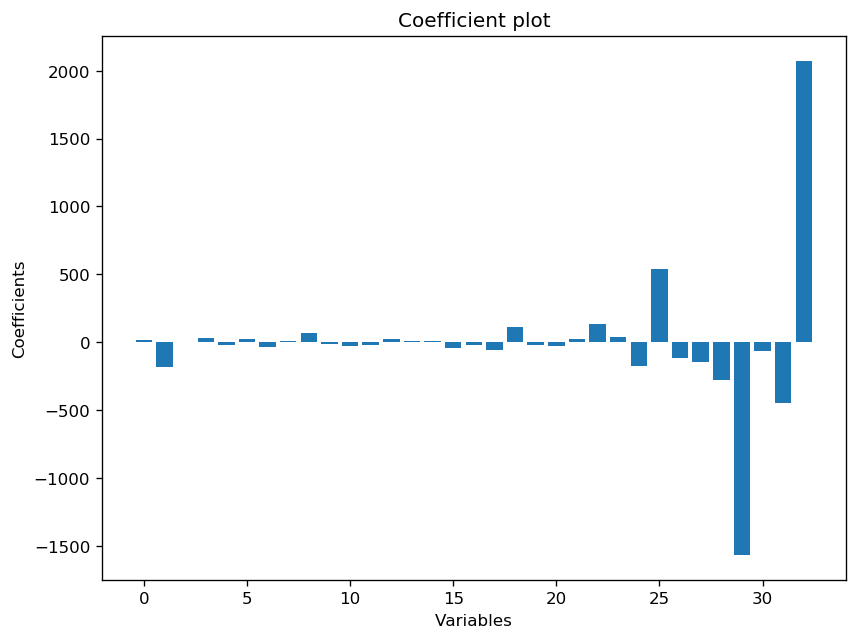

In [131]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [169]:
#Coefficients of LR
cdf = pd.DataFrame(lr.coef_,X_train.columns,columns=['Coeffecients'])
cdf

,Coeffecients
Item_MRP,1.551276e+01
Outlet_Establishment_Year,3.488796e+01
Item_Fat_Content_low fat,-2.594955e+14
Item_Fat_Content_regular,-2.594955e+14
Item_Type_Baking Goods,-6.597858e+14
Item_Type_Breads,-6.597858e+14
Item_Type_Breakfast,-6.597858e+14
Item_Type_Canned,-6.597858e+14
Item_Type_Dairy,-6.597858e+14
Item_Type_Frozen Foods,-6.597858e+14


#  Checking assumptions of Linear Model

In [133]:
#finding the residuals
res = pd.DataFrame({
    'Predicted_values':test_pred,
    'Actual_values':y_test,
})

res['residuals'] = res['Actual_values'] - res['Predicted_values']
res.head()

,Predicted_values,Actual_values,residuals
7151,2741.428644,2466.79,-274.64
6619,2870.899434,2316.98,-553.915
1596,1237.624968,1733.08,495.452
522,-995.259925,276.307,1271.57
696,2997.766563,2816.33,-181.433


In [134]:
res['Predicted_values'].shape

(1705,)

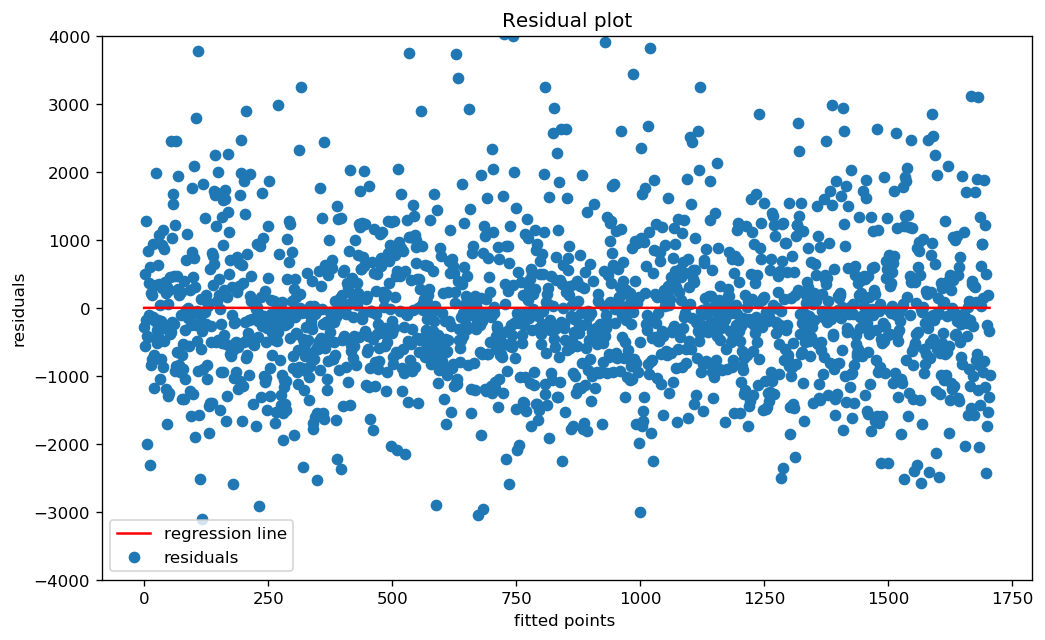

In [135]:
#Plotting residuals
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,1705)
k = [0 for i in range(0,1705)] #dep on shape of fitted res
plt.scatter( f, res.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

Here there is no clear pattern in the residuals to say it as Non-linear or Heteroskedasity.

# Checking Distribution of Residuals

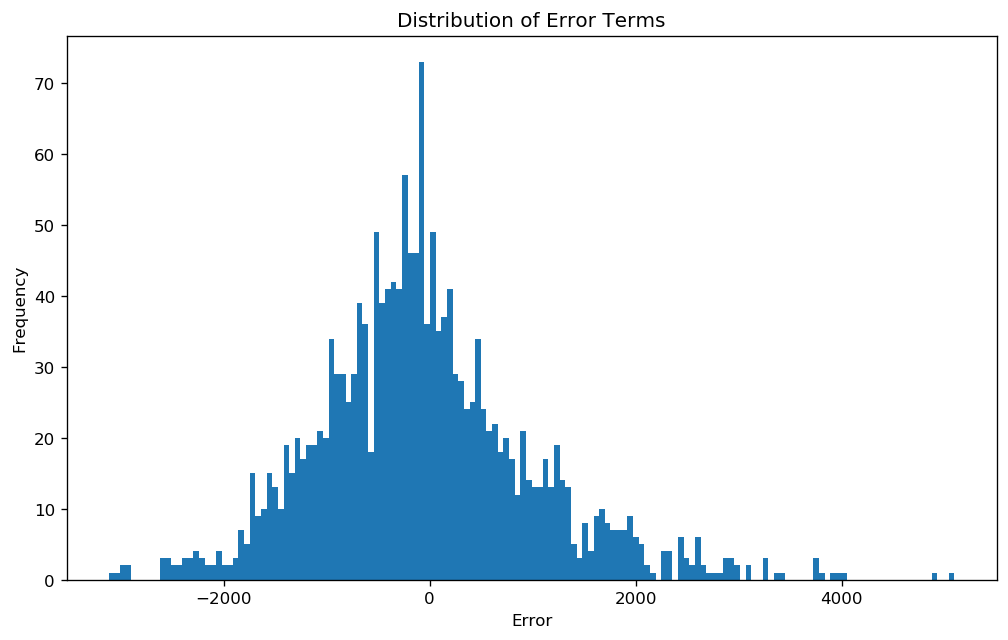

In [136]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(res.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

The Distribution is normal with a few outliers

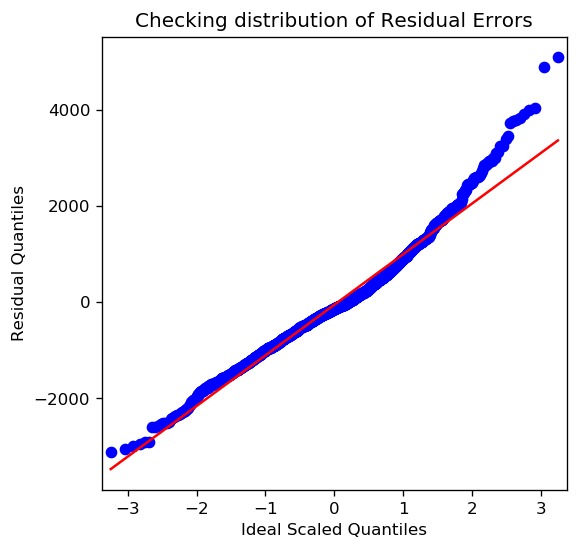

In [171]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(res.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

Above graph agin indicated that the errors are normally distributed

# Normalising the Coefficients 

In [139]:
lr = LinearRegression(normalize= True)

In [140]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [141]:
# Predicting the model on the train dataset
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as msee
train_pred = lr.predict(X_train)
k = mae(y_train,train_pred)
k1 = msee(y_train,train_pred)
print('The mae in the train data set is',k )
print('The mse in the train data set is',k1)

# Predicting the model on the test dataset
test_pred = lr.predict(X_test)
k = mae(y_test,test_pred)
k1 = msee(y_test,test_pred)
print('The mae in the test data set is',k )
print('The mse in the test data set is',k1)

The mae in the train data set is 848.0353426224699
The mse in the train data set is 1310648.6283276926
The mae in the test data set is 792.6467697360703
The mse in the test data set is 1111051.4639797038


Text(0.5, 1.0, 'Normalized Coefficient plot')

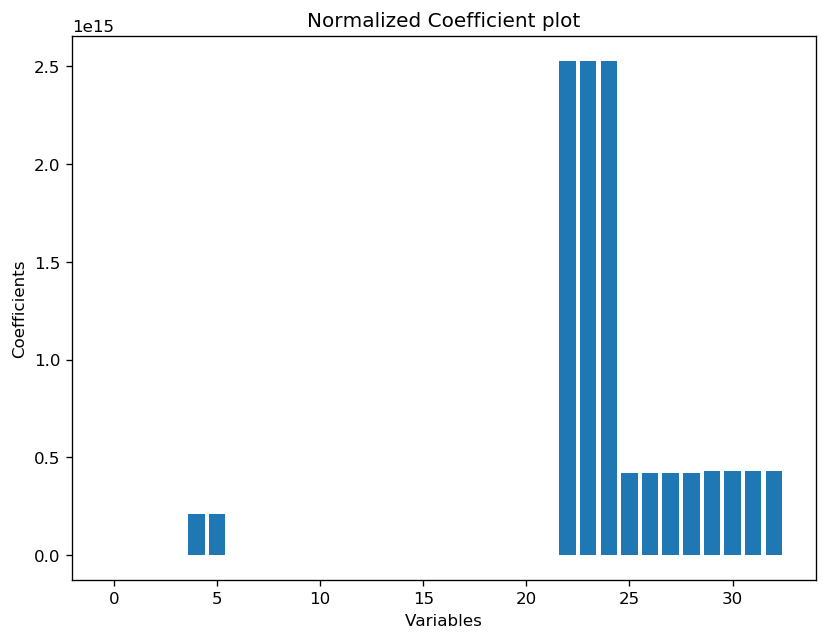

In [142]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

# Selecting higher co eff and fitting again in the model

In [143]:
cdf_norm = pd.DataFrame({
    'Coefficients':lr.coef_,
    'variables':X_train.columns,})
cdf_norm

,Coefficients,variables
0,1.554401e+01,Item_MRP
1,-1.846054e+02,Item_Visibility
2,-5.459706e-01,Item_Weight
3,3.365523e+01,Outlet_Establishment_Year
4,2.090746e+14,Item_Fat_Content_low fat
5,2.090746e+14,Item_Fat_Content_regular
6,5.498855e+11,Item_Type_Baking Goods
7,5.498855e+11,Item_Type_Breads
8,5.498855e+11,Item_Type_Breakfast
9,5.498855e+11,Item_Type_Canned


In [145]:
sig_var = cdf_norm[cdf_norm.Coefficients > 0.5]

In [146]:
subset = X_Dummies[sig_var['variables'].values]
subset.head()

,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_not_categorised,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,1999,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,48.2692,2009,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,141.6180,1999,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,182.0950,1998,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,53.8614,1987,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [157]:
test_normal = test_dummies[sig_var['variables'].values]
test_normal.head()

,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_not_categorised,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,107.8622,1999,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8524,87.3198,2007,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
8525,241.7538,1998,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
8526,155.0340,2007,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8527,234.2300,1985,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [147]:
subset.shape

(8523, 31)

In [148]:
X = subset

In [149]:
X.shape

(8523, 31)

In [150]:
y = X_Dummies['Item_Outlet_Sales']

In [151]:
y.shape

(8523,)

In [152]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print('X_train shape:', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape', y_test.shape)
print('percent in X_train:', X_train.shape[0]/(X_train.shape[0] + X_test.shape[0]))
print('percent in X_test:', X_test.shape[0]/(X_train.shape[0] + X_test.shape[0]))


X_train shape: (6818, 31)
y_train shape (6818,)
X_test shape: (1705, 31)
y_test shape (1705,)
percent in X_train: 0.7999530681684853
percent in X_test: 0.20004693183151473


In [153]:
lr = LinearRegression(normalize=True)

In [154]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [159]:
lr.score(X_test,y_test)

0.5489918980388665

In [160]:
re_pred = lr.predict(test_normal)

In [161]:
re_pred = pd.DataFrame(re_pred,index=None,columns=['predicted'])

In [162]:
re_pred.to_csv('normalised.csv')

In [163]:
# Predicting the model on the train dataset
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as msee
train_pred = lr.predict(X_train)
k = mae(y_train,train_pred)
k1 = msee(y_train,train_pred)
print('The mae in the train data set is',k )
print('The mse in the train data set is',k1)

# Predicting the model on the test dataset
test_pred = lr.predict(X_test)
k = mae(y_test,test_pred)
k1 = msee(y_test,test_pred)
print('The mae in the test data set is',k )
print('The mse in the test data set is',k1)

The mae in the train data set is 834.9013912804342
The mse in the train data set is 1265867.5010560344
The mae in the test data set is 835.9720117595308
The mse in the test data set is 1293053.1908764613


Text(0.5, 1.0, 'Normalized Coefficient plot')

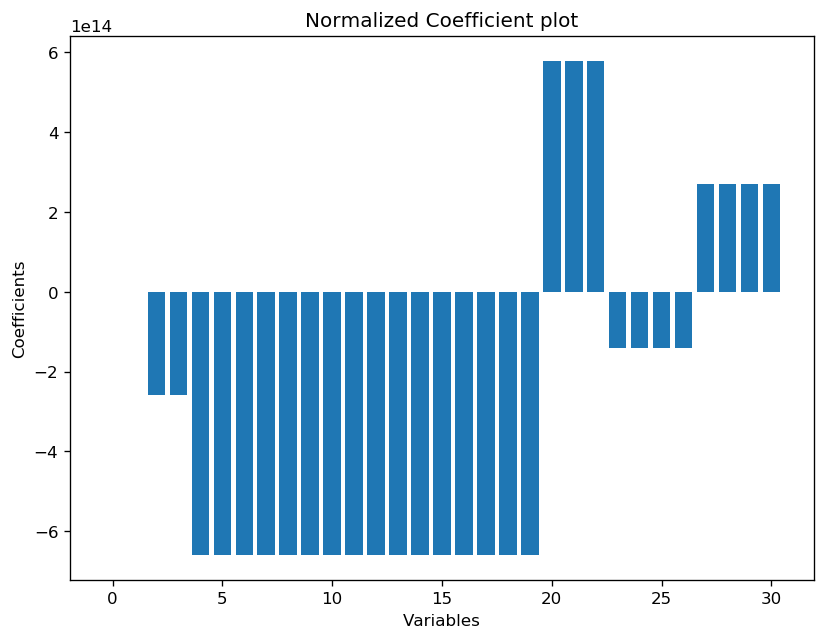

In [164]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')